In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

## import news csv

In [7]:
news = pd.read_csv('../csv_files/news/migr_news_year_percent.csv')

In [8]:
news

,financial_year,percentage,year_only,t,const
0,2002-07-01,0.455606,2002.0,1,1
1,2003-07-01,0.498948,2003.0,2,1
2,2004-07-01,0.395300,2004.0,3,1
3,2005-07-01,0.470755,2005.0,4,1
4,2006-07-01,0.360467,2006.0,5,1
5,2007-07-01,0.240773,2007.0,6,1
6,2008-07-01,0.311291,2008.0,7,1
7,2009-07-01,0.577675,2009.0,8,1
8,2010-07-01,0.713295,2010.0,9,1
9,2011-07-01,0.527310,2011.0,10,1


In [9]:
news.dtypes

financial_year     object
percentage        float64
year_only         float64
t                   int64
const               int64
dtype: object

In [10]:
news['financial_year'] = pd.to_datetime(news['financial_year'])

In [11]:
news.dtypes

financial_year    datetime64[ns]
percentage               float64
year_only                float64
t                          int64
const                      int64
dtype: object

In [12]:
news_perc = news[['percentage', 'financial_year']]

In [13]:
news_perc.dtypes

percentage               float64
financial_year    datetime64[ns]
dtype: object

## Import total immigrants csv

In [16]:
immigrants = pd.read_csv('../csv_files/immigration_stats/total_immigrants_year.csv')

In [17]:
immigrants

,financial_year,total_immigrants,year_only,t,const
0,2002-07-01,125870.0,2002,1,1
1,2003-07-01,148431.0,2003,2,1
2,2004-07-01,162801.0,2004,3,1
3,2005-07-01,174782.0,2005,4,1
4,2006-07-01,190864.0,2006,5,1
5,2007-07-01,203238.0,2007,6,1
6,2008-07-01,219547.0,2008,7,1
7,2009-07-01,203647.0,2009,8,1
8,2010-07-01,207855.0,2010,9,1
9,2011-07-01,237371.0,2011,10,1


In [18]:
immigrants.dtypes

financial_year       object
total_immigrants    float64
year_only             int64
t                     int64
const                 int64
dtype: object

In [19]:
immigrants['financial_year'] = pd.to_datetime(immigrants['financial_year'])

In [20]:
immigrants.dtypes

financial_year      datetime64[ns]
total_immigrants           float64
year_only                    int64
t                            int64
const                        int64
dtype: object

## Merge immigration stats & news

In [21]:
immigr_merge = immigrants.merge(news_perc, left_on='financial_year', right_on='financial_year', copy = False)

In [22]:
immigr_merge.dtypes

financial_year      datetime64[ns]
total_immigrants           float64
year_only                    int64
t                            int64
const                        int64
percentage                 float64
dtype: object

In [23]:
immigr_merge

,financial_year,total_immigrants,year_only,t,const,percentage
0,2002-07-01,125870.0,2002,1,1,0.455606
1,2003-07-01,148431.0,2003,2,1,0.498948
2,2004-07-01,162801.0,2004,3,1,0.395300
3,2005-07-01,174782.0,2005,4,1,0.470755
4,2006-07-01,190864.0,2006,5,1,0.360467
5,2007-07-01,203238.0,2007,6,1,0.240773
6,2008-07-01,219547.0,2008,7,1,0.311291
7,2009-07-01,203647.0,2009,8,1,0.577675
8,2010-07-01,207855.0,2010,9,1,0.713295
9,2011-07-01,237371.0,2011,10,1,0.527310


In [24]:
immigr_merge = immigr_merge.rename(columns={'percentage': 'migr_news_perc'})

In [25]:
immigr_merge.columns

Index(['financial_year', 'total_immigrants', 'year_only', 't', 'const',
       'migr_news_perc'],
      dtype='object')

In [26]:
immigr_merge = immigr_merge[['financial_year', 'total_immigrants', 
                 'migr_news_perc', 'year_only', 't', 'const']]

In [27]:
immigr_merge

,financial_year,total_immigrants,migr_news_perc,year_only,t,const
0,2002-07-01,125870.0,0.455606,2002,1,1
1,2003-07-01,148431.0,0.498948,2003,2,1
2,2004-07-01,162801.0,0.395300,2004,3,1
3,2005-07-01,174782.0,0.470755,2005,4,1
4,2006-07-01,190864.0,0.360467,2006,5,1
5,2007-07-01,203238.0,0.240773,2007,6,1
6,2008-07-01,219547.0,0.311291,2008,7,1
7,2009-07-01,203647.0,0.577675,2009,8,1
8,2010-07-01,207855.0,0.713295,2010,9,1
9,2011-07-01,237371.0,0.527310,2011,10,1


## Import subregion csv

In [28]:
subregion = pd.read_csv('../csv_files/immigration_stats/immigrants_subregion_year.csv')

In [29]:
subregion

,financial_year,Central Asia,North Africa & the Middle East,North East Asia,North-West Europe,Northern America,Oceania,"South America, Central America & the Caribbean",South East Asia,Southern Asia,Southern and Eastern Europe,Sub-Saharan Africa,year_only,t,total_immigrants
0,2002-07-01,1099.0,11440.0,17084.0,22324.0,3670.0,16775.0,1955.0,21037.0,12910.0,6669.0,10907.0,2002,1,125870.0
1,2003-07-01,1410.0,12203.0,21171.0,29428.0,4012.0,19131.0,2166.0,22881.0,16662.0,5846.0,13521.0,2003,2,148431.0
2,2004-07-01,1697.0,13797.0,25342.0,30142.0,4128.0,22263.0,2392.0,23685.0,19692.0,5561.0,14102.0,2004,3,162801.0
3,2005-07-01,2767.0,12057.0,27540.0,35764.0,4410.0,23963.0,2677.0,24463.0,22506.0,5656.0,12979.0,2005,4,174782.0
4,2006-07-01,2460.0,10845.0,31584.0,36063.0,4201.0,28392.0,2585.0,26192.0,28476.0,5502.0,14564.0,2006,5,190864.0
5,2007-07-01,1980.0,9828.0,31172.0,37608.0,4332.0,33308.0,3046.0,28050.0,33002.0,5772.0,15140.0,2007,6,203238.0
6,2008-07-01,1883.0,12558.0,32609.0,39818.0,4619.0,32515.0,3362.0,29994.0,36024.0,6190.0,19975.0,2008,7,219547.0
7,2009-07-01,1770.0,9936.0,33166.0,33508.0,4802.0,24685.0,4086.0,30196.0,34761.0,6079.0,20658.0,2009,8,203647.0
8,2010-07-01,2095.0,11137.0,37147.0,28565.0,4471.0,34060.0,3479.0,30907.0,33828.0,5813.0,16353.0,2010,9,207855.0
9,2011-07-01,1697.0,11239.0,34705.0,36520.0,4963.0,42925.0,4121.0,34324.0,43190.0,6808.0,16879.0,2011,10,237371.0


In [30]:
subregion.dtypes

financial_year                                     object
Central Asia                                      float64
North Africa & the Middle East                    float64
North East Asia                                   float64
North-West Europe                                 float64
Northern America                                  float64
Oceania                                           float64
South America, Central America & the Caribbean    float64
South East Asia                                   float64
Southern Asia                                     float64
Southern and Eastern Europe                       float64
Sub-Saharan Africa                                float64
year_only                                           int64
t                                                   int64
total_immigrants                                  float64
dtype: object

In [31]:
subregion['financial_year'] = pd.to_datetime(subregion['financial_year'])

In [32]:
subregion.dtypes

financial_year                                    datetime64[ns]
Central Asia                                             float64
North Africa & the Middle East                           float64
North East Asia                                          float64
North-West Europe                                        float64
Northern America                                         float64
Oceania                                                  float64
South America, Central America & the Caribbean           float64
South East Asia                                          float64
Southern Asia                                            float64
Southern and Eastern Europe                              float64
Sub-Saharan Africa                                       float64
year_only                                                  int64
t                                                          int64
total_immigrants                                         float64
dtype: object

In [33]:
subregion.columns

Index(['financial_year', 'Central Asia', 'North Africa & the Middle East',
       'North East Asia', 'North-West Europe', 'Northern America', 'Oceania',
       'South America, Central America & the Caribbean', 'South East Asia',
       'Southern Asia', 'Southern and Eastern Europe', 'Sub-Saharan Africa',
       'year_only', 't', 'total_immigrants'],
      dtype='object')

## Merge subregional stats with news

In [34]:
region_merge = subregion.merge(news_perc, left_on='financial_year', right_on='financial_year', copy = False)

In [35]:
region_merge

,financial_year,Central Asia,North Africa & the Middle East,North East Asia,North-West Europe,Northern America,Oceania,"South America, Central America & the Caribbean",South East Asia,Southern Asia,Southern and Eastern Europe,Sub-Saharan Africa,year_only,t,total_immigrants,percentage
0,2002-07-01,1099.0,11440.0,17084.0,22324.0,3670.0,16775.0,1955.0,21037.0,12910.0,6669.0,10907.0,2002,1,125870.0,0.455606
1,2003-07-01,1410.0,12203.0,21171.0,29428.0,4012.0,19131.0,2166.0,22881.0,16662.0,5846.0,13521.0,2003,2,148431.0,0.498948
2,2004-07-01,1697.0,13797.0,25342.0,30142.0,4128.0,22263.0,2392.0,23685.0,19692.0,5561.0,14102.0,2004,3,162801.0,0.395300
3,2005-07-01,2767.0,12057.0,27540.0,35764.0,4410.0,23963.0,2677.0,24463.0,22506.0,5656.0,12979.0,2005,4,174782.0,0.470755
4,2006-07-01,2460.0,10845.0,31584.0,36063.0,4201.0,28392.0,2585.0,26192.0,28476.0,5502.0,14564.0,2006,5,190864.0,0.360467
5,2007-07-01,1980.0,9828.0,31172.0,37608.0,4332.0,33308.0,3046.0,28050.0,33002.0,5772.0,15140.0,2007,6,203238.0,0.240773
6,2008-07-01,1883.0,12558.0,32609.0,39818.0,4619.0,32515.0,3362.0,29994.0,36024.0,6190.0,19975.0,2008,7,219547.0,0.311291
7,2009-07-01,1770.0,9936.0,33166.0,33508.0,4802.0,24685.0,4086.0,30196.0,34761.0,6079.0,20658.0,2009,8,203647.0,0.577675
8,2010-07-01,2095.0,11137.0,37147.0,28565.0,4471.0,34060.0,3479.0,30907.0,33828.0,5813.0,16353.0,2010,9,207855.0,0.713295
9,2011-07-01,1697.0,11239.0,34705.0,36520.0,4963.0,42925.0,4121.0,34324.0,43190.0,6808.0,16879.0,2011,10,237371.0,0.527310


# Regressions

### linear regression (OLS) to check if correlation between number of immigrants and percentage of news about migration

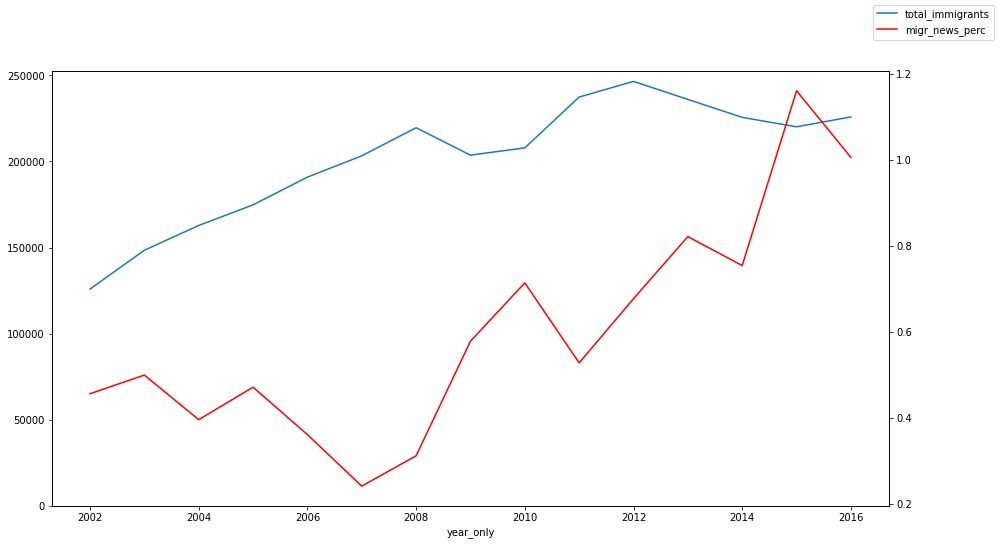

In [36]:
#plot
ax = immigr_merge.plot(x="year_only", y="total_immigrants", legend=False)
ax2 = ax.twinx()
immigr_merge.plot(x="year_only", y="migr_news_perc", ax=ax2, legend=False, color="r", figsize=(15,8))
ax.figure.legend()
ax.set_ylim(bottom=0)
plt.show()

- both general upward trend
- but looks inverse: when there are less migration news stories, there are more immigrants, when there are more migration news stories, there are less immigrants
    

In [37]:
#regression
y = immigr_merge["migr_news_perc"]
X = immigr_merge[["const", 'total_immigrants']] 
lin_reg = sm.OLS(y, X)
results = lin_reg.fit()
results.summary()

/Users/imogen/opt/anaconda3/envs/matrix/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         migr_news_perc   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     3.354
Date:                Thu, 29 Oct 2020   Prob (F-statistic):             0.0901
Time:                        15:18:10   Log-Likelihood:                 1.2626
No. Observations:                  15   AIC:                             1.475
Df Residuals:                      13   BIC:                             2.891
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0749      0.372     -0.201      0.844      -0.880       0.730
total_immigrants  3.332e-06   1.82e-06      1.831      0.090   -5.99e-07    7.26e-06
==============================================================================
Omnibus:                        1.011   Durbin-Watson:                   0.719
Prob(Omnibus):                  0.603   Jarque-Bera (JB):                0.349
Skew:                           0.373   Prob(JB):                        0.840
Kurtosis:                       2.979   Cond. No.                     1.24e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R squared of 0.205 indicates weak positive correlation
- Given our data, assuming the null hypothesis (of 0), the likelihood of obtaining the regression coefficient that we observed or more extreme is 0.090. Since this is above the Alpha level of 5%, it is statistically insignificant and we cannot reject the null hypothesis.

### Multivariate regression to check for correlations between news on migration and migration from developing country regions

In [39]:
#add constant
region_merge = region_merge.assign(const=1)
#regression
y = region_merge['percentage']
X = region_merge[["const", "North Africa & the Middle East", 'Central Asia', 
                  'Southern Asia', 'Sub-Saharan Africa', 'North East Asia']] 
lin_reg = sm.OLS(y, X)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             percentage   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     3.886
Date:                Thu, 29 Oct 2020   Prob (F-statistic):             0.0374
Time:                        15:21:15   Log-Likelihood:                 8.1678
No. Observations:                  15   AIC:                            -4.336
Df Residuals:                       9   BIC:                          -0.08739
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.4251      0.439      0.968      0.358      -0.568       1.419
North Africa & the Middle East  1.125e-05    1.4e-05      0.803      0.443   -2.04e-05    4.29e-05
Central Asia                   -1.623e-05   8.53e-05     -0.190      0.853      -0.000       0.000
Southern Asia                    8.16e-06   9.07e-06      0.900      0.392   -1.23e-05    2.87e-05
Sub-Saharan Africa             -3.237e-05   2.39e-05     -1.352      0.209   -8.65e-05    2.18e-05
North East Asia                 7.193e-06   2.08e-05      0.345      0.738   -3.99e-05    5.43e-05
==============================================================================
Omnibus:                        0.381   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.827   Jarque-Bera (JB):                0.372
Skew:                           0.303   Prob(JB):                        0.830
Kurtosis:                       2.522   Cond. No.                     5.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- P values indicate statistically insignificant

In [40]:
#regression
y = region_merge['percentage']
X = region_merge[["const", 'North-West Europe', 'Northern America', 'Oceania', 
                  'Southern and Eastern Europe', 'North East Asia']] 
lin_reg = sm.OLS(y, X)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             percentage   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     17.05
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           0.000235
Time:                        15:21:22   Log-Likelihood:                 17.157
No. Observations:                  15   AIC:                            -22.31
Df Residuals:                       9   BIC:                            -18.07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.1846      0.331      0.557      0.591      -0.565       0.934
North-West Europe           -3.153e-05   9.38e-06     -3.362      0.008   -5.28e-05   -1.03e-05
Northern America                0.0003      0.000      1.536      0.159      -0.000       0.001
Oceania                     -9.761e-06   4.81e-06     -2.029      0.073   -2.06e-05    1.12e-06
Southern and Eastern Europe -1.775e-05    7.4e-05     -0.240      0.816      -0.000       0.000
North East Asia              1.773e-05   8.92e-06      1.987      0.078   -2.45e-06    3.79e-05
==============================================================================
Omnibus:                        4.693   Durbin-Watson:                   2.982
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                2.531
Skew:                           0.990   Prob(JB):                        0.282
Kurtosis:                       3.365   Cond. No.                     6.97e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- P value indicates statistically insignificant correlations, except in the case of North-West Europe